In [1]:
# Imports
from sliderule import sliderule, earthdata, swot
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy

Unable to import sklearn... clustering support disabled


In [2]:
# Query EarthData for SWOT data at Area of Interest
region = sliderule.toregion("../data/grandmesa.geojson")
granules = earthdata.cmr(short_name="SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1", polygon=region["poly"], time_start=None)
granules

['SWOT_L2_LR_SSH_Expert_009_009_20111121T053342_20111121T062448_DG10_01.nc',
 'SWOT_L2_LR_SSH_Expert_238_002_20120705T114746_20120705T123852_DG10_01.nc']

In [3]:
# Boundary information from EarthData for SWOT_L2_LR_SSH_Expert_238_002_20120705T114746_20120705T123852_DG10_01.nc 
track = {
    "points": [
        {
          "longitude": -180,
          "latitude": 77.32443
        },
        {
          "longitude": -180,
          "latitude": 75.96161
        },
        {
          "longitude": -162.09458,
          "latitude": 72.95769
        },
        {
          "longitude": -148.71771,
          "latitude": 68.02475
        },
        {
          "longitude": -139.57473,
          "latitude": 61.46376
        },
        {
          "longitude": -132.76541,
          "latitude": 52.52883
        },
        {
          "longitude": -128.23535,
          "latitude": 42.33934
        },
        {
          "longitude": -124.53764,
          "latitude": 28.97745
        },
        {
          "longitude": -116.14332,
          "latitude": -22.21489
        },
        {
          "longitude": -112.54563,
          "latitude": -38.63235
        },
        {
          "longitude": -107.59535,
          "latitude": -52.02395
        },
        {
          "longitude": -101.02934,
          "latitude": -61.71245
        },
        {
          "longitude": -96.51192,
          "latitude": -65.80947
        },
        {
          "longitude": -91.33566,
          "latitude": -69.12003
        },
        {
          "longitude": -77.82439,
          "latitude": -74.1454
        },
        {
          "longitude": -59.19556,
          "latitude": -77.20514
        },
        {
          "longitude": -35.45207,
          "latitude": -78.29215
        },
        {
          "longitude": -35.45501,
          "latitude": -77.0331
        },
        {
          "longitude": -59.11783,
          "latitude": -75.83566
        },
        {
          "longitude": -77.9601,
          "latitude": -72.38965
        },
        {
          "longitude": -90.38687,
          "latitude": -67.38657
        },
        {
          "longitude": -99.59434,
          "latitude": -60.19465
        },
        {
          "longitude": -106.37693,
          "latitude": -50.25634
        },
        {
          "longitude": -111.51882,
          "latitude": -36.48096
        },
        {
          "longitude": -115.3008,
          "latitude": -19.27607
        },
        {
          "longitude": -123.63896,
          "latitude": 31.6175
        },
        {
          "longitude": -127.38371,
          "latitude": 45.02024
        },
        {
          "longitude": -131.90094,
          "latitude": 54.92655
        },
        {
          "longitude": -139.12559,
          "latitude": 63.9081
        },
        {
          "longitude": -148.94375,
          "latitude": 70.29256
        },
        {
          "longitude": -162.17736,
          "latitude": 74.64083
        },
        {
          "longitude": -180,
          "latitude": 77.32443
        }
    ]
}

In [4]:
# Build GeoDataFrame of Boundary
lat = [p['latitude'] for p in track['points']]
lon = [p['longitude'] for p in track['points']]
data = [x for x in range(len(lon))]
a = {"latitude": lat, "longitude": lon, "time": numpy.array(data)}
gdf = sliderule.todataframe(a)

/tmp/ipykernel_836011/2934838053.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  region['gdf'].buffer(1.0).plot(ax=ax, color='green')


<Axes: >

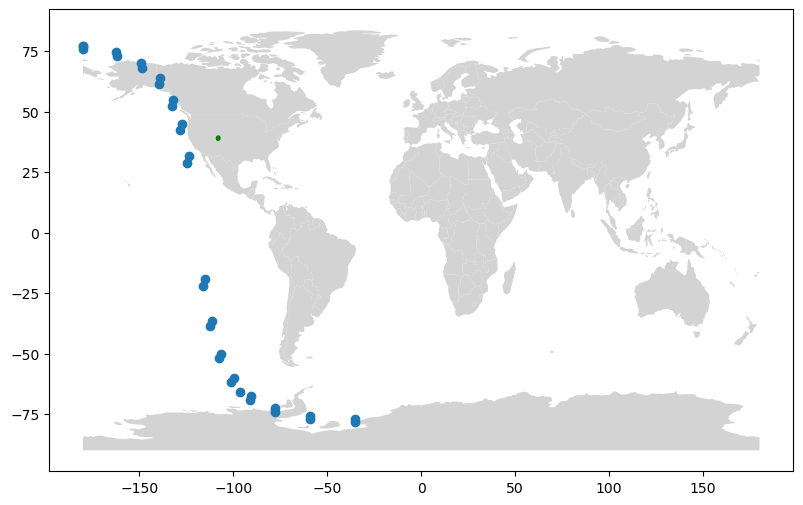

In [5]:
# Plot Boundary and Area of Interest on World Map
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
gdf.plot(ax=ax)
region['gdf'].buffer(1.0).plot(ax=ax, color='green')